In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Đọc dữ liệu (giả sử dữ liệu đã được tải vào DataFrame)
df = pd.read_csv('/kaggle/input/diabetes-hocmon-general-hospital/cleaned_data.csv')  # Thay bằng dữ liệu của bạn
# Dữ liệu của bạn đã được cung cấp, tôi sẽ giả định nó đã ở dạng DataFrame

# Tách features (X) và target (y)
X = df.drop('Diabetes', axis=1)  # Các cột từ Gender đến TRI
y = df['Diabetes']  # Cột Diabetes

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [2]:
X.head()

,Gender,Age,ALT,AST,CHO,CL,CRE,EGFR,GLU,HDL,HDL1,LDL,NA,TRI
0,0,65,22.92,19.95,5.19,100.97,94.75,57.66,5.96,1.27,3.92,3.10,137.20,1.89
1,1,52,30.10,30.86,5.19,101.22,95.20,83.37,6.23,1.27,3.92,3.16,136.23,1.89
2,1,67,26.24,28.39,5.36,99.93,87.24,86.22,12.31,1.01,4.35,3.61,135.74,1.62
3,1,66,16.66,16.88,8.14,102.00,106.59,66.75,6.10,1.42,6.72,5.51,138.00,1.89
4,0,69,21.52,27.99,5.34,99.72,67.96,85.40,8.39,1.53,3.81,3.15,135.46,0.86


In [4]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Diabetes, dtype: int64

<h1 style="color: red;">Neural Network for Diabetes Prediction</h1>

### Using Neural network with 1 hidden layers

In [5]:
# Xây dựng mô hình
model = Sequential([
    Dense(5, input_dim=X_train.shape[1], activation='relu'),  # Lớp ẩn với 5 nơ-ron, input_dim = 14 (số đặc trưng)
    Dense(1, activation='sigmoid')  # Lớp đầu ra với 1 nơ-ron
])

# Biên dịch mô hình
optimizer = SGD(learning_rate=0.01)  # Thử với learning rate 0.01
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              75 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

### Training model

In [18]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)
model.save('model_1_hidden.h5')
print("Đã lưu mô hình 1 lớp ẩn vào 'model_1_hidden.h5'")

Epoch 1/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7676 - loss: 0.5168 - val_accuracy: 0.7641 - val_loss: 0.5050
Epoch 2/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7660 - loss: 0.5115 - val_accuracy: 0.7899 - val_loss: 0.5050
Epoch 3/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7792 - loss: 0.5178 - val_accuracy: 0.7765 - val_loss: 0.5047
Epoch 4/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.5175 - val_accuracy: 0.7803 - val_loss: 0.5040
Epoch 5/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.5141 - val_accuracy: 0.7765 - val_loss: 0.5053
Epoch 6/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.5084 - val_accuracy: 0.7947 - val_loss: 0.5048
Epoch 7/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7810 - loss: 0.5177 - val_accuracy: 0.7813 - val_loss: 0.5036
Epoch 8/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.5132 - val_accu

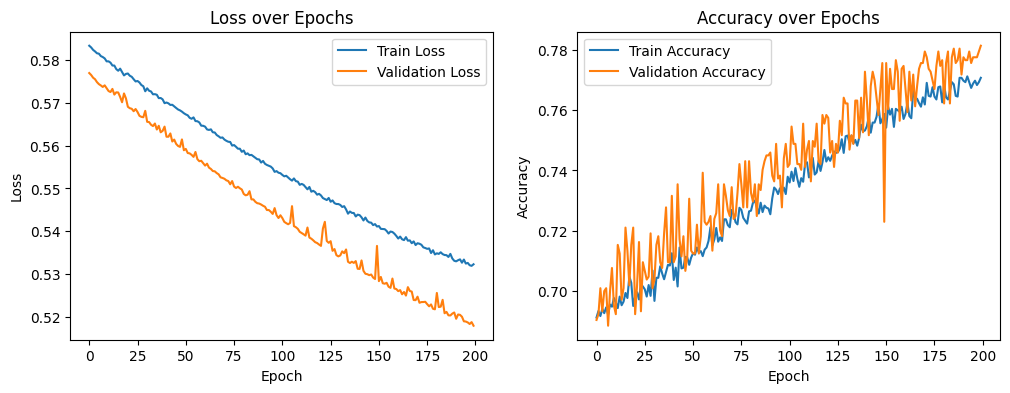

In [8]:
# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Validate model with K-fold Cross-Validation

In [9]:
# Định nghĩa hàm để tạo mô hình
def create_model():
    model = Sequential([
        Dense(5, input_dim=X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Sử dụng StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=200, batch_size=32, verbose=0)
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    accuracies.append(scores[1])  # Lấy accuracy

print(f"Cross-Validation Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Cross-Validation Accuracy: 0.7023 ± 0.0141


### Using Neural Network with 2 hidden layers

In [19]:
# Mô hình với 2 lớp ẩn
model_2_layers = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Lớp ẩn 1: 16 nơ-ron
    Dense(8, activation='relu'),  # Lớp ẩn 2: 8 nơ-ron
    Dense(1, activation='sigmoid')
])

# Biên dịch và huấn luyện
model_2_layers.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_2_layers = model_2_layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=32, verbose=1)

# Save file
model_2_layers.save('model_2_hidden.h5')
print("Đã lưu mô hình 2 lớp ẩn vào 'model_2_hidden.h5'")

Epoch 1/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5175 - loss: 0.6856 - val_accuracy: 0.5224 - val_loss: 0.6830
Epoch 2/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 0.6821 - val_accuracy: 0.5807 - val_loss: 0.6808
Epoch 3/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6057 - loss: 0.6824 - val_accuracy: 0.5664 - val_loss: 0.6795
Epoch 4/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5887 - loss: 0.6789 - val_accuracy: 0.5931 - val_loss: 0.6781
Epoch 5/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 0.6795 - val_accuracy: 0.5836 - val_loss: 0.6767
Epoch 6/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6122 - loss: 0.6736 - val_accuracy: 0.6199 - val_loss: 0.6739
Epoch 7/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - loss: 0.6752 - val_accuracy: 0.6199 - val_loss: 0.6718
Epoch 8/400
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6276 - loss: 0.6729 - val_accu

### Using Neural Network with 3 hidden layers

In [17]:
# Mô hình với 3 lớp ẩn
model_3_layers = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),  # Lớp ẩn 1: 32 nơ-ron
    Dense(16, activation='relu'),  # Lớp ẩn 2: 16 nơ-ron
    Dense(8, activation='relu'),  # Lớp ẩn 3: 8 nơ-ron
    Dense(1, activation='sigmoid')
])

# Biên dịch và huấn luyện
model_3_layers.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_3_layers = model_3_layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800, batch_size=32, verbose=1)

# Save file
model_3_layers.save('model_3_hidden.h5')
print("Đã lưu mô hình 3 lớp ẩn vào 'model_3_hidden.h5'")

Epoch 1/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5309 - loss: 0.6929 - val_accuracy: 0.5043 - val_loss: 0.6887
Epoch 2/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 0.6859 - val_accuracy: 0.5053 - val_loss: 0.6860
Epoch 3/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 0.6844 - val_accuracy: 0.5396 - val_loss: 0.6830
Epoch 4/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 0.6795 - val_accuracy: 0.5769 - val_loss: 0.6801
Epoch 5/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5890 - loss: 0.6775 - val_accuracy: 0.5740 - val_loss: 0.6771
Epoch 6/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 0.6745 - val_accuracy: 0.5549 - val_loss: 0.6739
Epoch 7/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5931 - loss: 0.6714 - val_accuracy: 0.5568 - val_loss: 0.6706
Epoch 8/800
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6152 - loss: 0.6648 - val_accu

## Demo first

In [13]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.7 MB/s eta 0:00:00:00:0100:01


In [15]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Tải dữ liệu để fit scaler (thay bằng dữ liệu của bạn)
data = pd.DataFrame({
    'Gender': [0, 1, 0],
    'Age': [67, 65, 53],
    'ALT': [15.62, 12.31, 165.08],
    'AST': [20.31, 18.45, 85.9],
    'CHO': [4.32, 5.12, 5.32],
    'CL': [102.31, 99.45, 101.23],
    'CRE': [88.14, 587.18, 90.45],
    'EGFR': [85.87, 9.63, 78.12],
    'GLU': [12.31, 10.31, 5.67],
    'HDL': [1.45, 1.23, 1.25],
    'HDL1': [1.43, 1.21, 1.23],
    'LDL': [2.31, 3.45, 3.12],
    'NA': [140.12, 138.45, 139.67],
    'TRI': [1.23, 2.45, 2.74],
    'Diabetes': [0, 1, 1]
})

X = data.drop('Diabetes', axis=1)
scaler = MinMaxScaler()
scaler.fit(X)

# Tạo mô hình (giả sử đã huấn luyện)
def create_model_1_hidden():
    model = Sequential([
        Dense(5, input_dim=14, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_1_hidden = create_model_1_hidden()
# model_1_hidden.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)  # Huấn luyện trước

# Hàm dự đoán
def predict_diabetes(input_data, model, scaler):
    input_df = pd.DataFrame([input_data], columns=['Gender', 'Age', 'ALT', 'AST', 'CHO', 'CL', 'CRE', 'EGFR', 'GLU', 'HDL', 'HDL1', 'LDL', 'NA', 'TRI'])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled, verbose=0)
    probability = prediction[0][0]
    predicted_class = 1 if probability > 0.5 else 0
    return predicted_class, probability

# Giao diện Streamlit
st.title("Dự đoán bệnh tiểu đường")
st.write("Nhập thông tin bệnh nhân để dự đoán nguy cơ tiểu đường:")

# Form nhập liệu
gender = st.selectbox("Giới tính", [0, 1], format_func=lambda x: "Nam" if x == 0 else "Nữ")
age = st.number_input("Tuổi", min_value=0, max_value=120, value=65)
alt = st.number_input("ALT (U/L)", min_value=0.0, value=12.31)
ast = st.number_input("AST (U/L)", min_value=0.0, value=18.45)
cho = st.number_input("Cholesterol (mmol/L)", min_value=0.0, value=5.12)
cl = st.number_input("Chloride (mmol/L)", min_value=0.0, value=99.45)
cre = st.number_input("Creatinine (µmol/L)", min_value=0.0, value=88.14)
egfr = st.number_input("EGFR (mL/min/1.73m²)", min_value=0.0, value=85.87)
glu = st.number_input("Glucose (mmol/L)", min_value=0.0, value=10.31)
hdl = st.number_input("HDL (mmol/L)", min_value=0.0, value=1.23)
hdl1 = st.number_input("HDL1 (mmol/L)", min_value=0.0, value=1.21)
ldl = st.number_input("LDL (mmol/L)", min_value=0.0, value=3.45)
na = st.number_input("Sodium (mmol/L)", min_value=0.0, value=138.45)
tri = st.number_input("Triglycerides (mmol/L)", min_value=0.0, value=2.45)

# Nút dự đoán
if st.button("Dự đoán"):
    input_data = {
        'Gender': gender,
        'Age': age,
        'ALT': alt,
        'AST': ast,
        'CHO': cho,
        'CL': cl,
        'CRE': cre,
        'EGFR': egfr,
        'GLU': glu,
        'HDL': hdl,
        'HDL1': hdl1,
        'LDL': ldl,
        'NA': na,
        'TRI': tri
    }
    
    pred, prob = predict_diabetes(input_data, model_1_hidden, scaler)
    st.write(f"**Kết quả dự đoán:** {'Có tiểu đường' if pred == 1 else 'Không có tiểu đường'}")
    st.write(f"**Xác suất:** {prob:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-21 03:42:50.574 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:42:50.640 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-21 03:42:50.641 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:42:50.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:42:50.643 Thread 'MainThread': missing ScriptRunContext! This warning can be ign